<a href="https://colab.research.google.com/github/SJinLee/DS/blob/main/01_crawling_naver_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 워드 클라우드 그려보기

목차

1. colab 환경, jupyter notebook
2. 구글 드라이브 연결
3. 설치
4. 네이버 뉴스 크롤링
5. pandas, DataFrame
6. wordcloud
7. 형태소 분석
8. 명사들의 wordcloud

### 1. colab 환경, jupyter notebook

* linux, ubuntu
* jupyter notebook 사용법

## 2. 구글 드라이브 연결

* 파일, 폴더 구조
* 파일 복사

In [ ]:
from google.colab import drive
drive.mount('gdrive')

### 3. 설치 & 데이터 사이언스 학과 소개

* 카이

In [ ]:
!git clone https://github.com/kakao/khaiii.git

In [ ]:
!mkdir khaiii/build

In [ ]:
!cd khaiii/build; cmake ..

In [ ]:
!cd khaiii/build; make all

In [ ]:
!cd khaiii/build; make resource

In [ ]:
!cd khaiii/build; make package_python

In [ ]:
!cd khaiii/build/package_python; pip install .

* 나눔폰트: https://hangeul.naver.com/2017/nanum

In [ ]:
!apt install fonts-nanum

### 4. 네이버 뉴스 크롤링

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd


In [ ]:
base_url = "https://news.naver.com"

[네이버 뉴스 소스 보기](https://drive.google.com/file/d/1y2JNxaSDeeUpHDJveg1Y3BDEgSGtPnRh/view?usp=sharing) : 네이버 뉴스 화면에서 F12를 누른다.

In [20]:
from urllib.request import Request
from urllib.error import HTTPError

def read_url(url):
    headers = {'User-Agent':' Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'}
    req = urllib.request.Request(url=url,headers=headers)
    try:
        handler = urllib.request.urlopen(req)
    except HTTPError as e:
        content = e.read()
    return handler.read()

In [21]:
data = read_url(base_url)

In [ ]:
data

In [22]:
soup = BeautifulSoup(data, "html.parser")
total_data = soup.find_all(attrs={'class': 'main_component droppable'})

In [ ]:
total_data[1]

In [25]:
category = [x.find(attrs={'class': 'tit_sec'}) for x in total_data]
category = [x.find('a').string if x is not None else '' for x in category]

In [26]:
data_str = []
for cat,data in zip(category[1:],total_data[1:]):
    news_list2 = data.find_all('li')
    news_list = [x.find('a') for x in news_list2]
    titles = [x.find('strong').text for x in news_list]
    news_url = [x.attrs['href'] for x in news_list]
    soups = [BeautifulSoup(read_url(x), "html.parser") for x in news_url]
    article_bodies = [x.find(attrs={'id': 'articleBodyContents'}) for x in soups]
    for ab in article_bodies:
      ab.find('script').decompose()
    for i in range(len(news_list)):
        data_str.append([cat,titles[i],news_url[i],str(article_bodies[i].text)])


### 5. pandas, DataFrame

In [28]:
columns = ['category','title','news_url','article_body']
df = pd.DataFrame(data_str,range(len(data_str)),columns)
df.to_csv('naver-news.csv')

In [ ]:
!cp naver-news.csv gdrive/My\ Drive/진로체험

In [ ]:
df

## 6. 워드클라우드(wordcloud)

In [29]:
text = ' '.join(df['article_body'])

In [ ]:
text

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=font_path,background_color='white').generate(text)

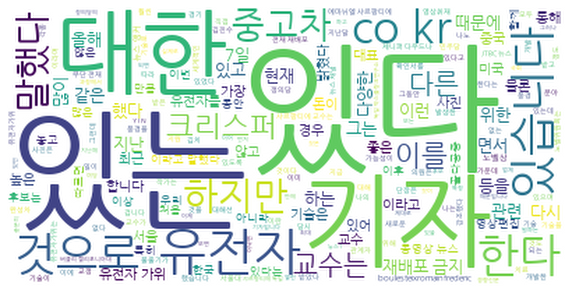

In [42]:
plt.figure(figsize=(10,8)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

## 7. 형태소 분석

In [43]:
from khaiii import KhaiiiApi
api = KhaiiiApi()
for word in api.analyze('안녕, 세상.'):
    print([[x.tag,x.lex] for x in word.morphs])

[['IC', '안녕'], ['SP', ',']]
[['NNG', '세상'], ['SF', '.']]


In [44]:
noun = []
for token in api.analyze(text):
  for x in token.morphs:
    if x.tag == 'NNG':
      noun.append(x.lex)

## 8. 명사들의 워드클라우드

In [45]:
wordcloud = WordCloud(font_path=font_path,background_color='white').generate(' '.join(noun))

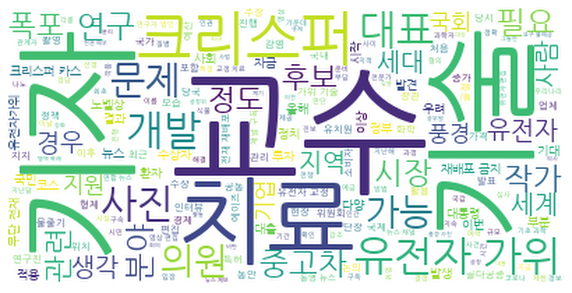

In [46]:
plt.figure(figsize=(10,8)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

## 9. 분야별 워드클라우드


In [47]:
df.columns

Index(['category', 'title', 'news_url', 'article_body'], dtype='object')

In [48]:
df['category'].unique()

array(['정치', '경제', '사회', '생활/문화', '세계', 'IT/과학'], dtype=object)

* 정치

In [49]:
index = df['category']=='정치'
df1 = df.loc[index]
text = ' '.join(df1['article_body'])

In [50]:
noun = []
for token in api.analyze(text):
  for x in token.morphs:
    if x.tag == 'NNG':
      noun.append(x.lex)

In [51]:
wordcloud = WordCloud(font_path='NanumGothic.ttf',background_color='white').generate(' '.join(noun))

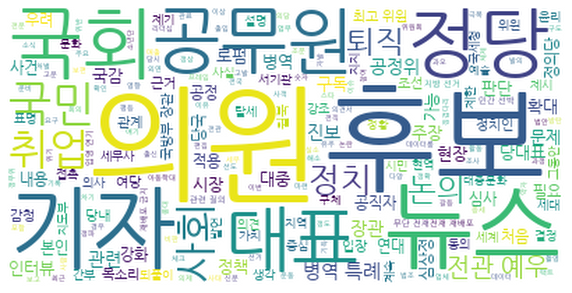

In [52]:
plt.figure(figsize=(10,8)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

* 경제

In [53]:
index = df['category']=='경제'
df1 = df.loc[index]
text = ' '.join(df1['article_body'])

In [54]:
noun = []
for token in api.analyze(text):
  for x in token.morphs:
    if x.tag == 'NNG':
      noun.append(x.lex)

In [55]:
wordcloud = WordCloud(font_path='NanumGothic.ttf',background_color='white').generate(' '.join(noun))

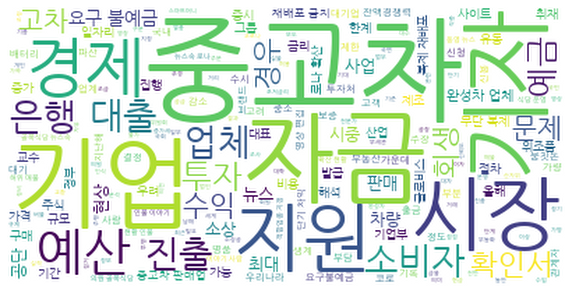

In [56]:
plt.figure(figsize=(10,8)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

* 사회

In [57]:
index = df['category']=='사회'
df1 = df.loc[index]
text = ' '.join(df1['article_body'])

In [58]:
noun = []
for token in api.analyze(text):
  for x in token.morphs:
    if x.tag == 'NNG':
      noun.append(x.lex)

In [59]:
wordcloud = WordCloud(font_path='NanumGothic.ttf',background_color='white').generate(' '.join(noun))

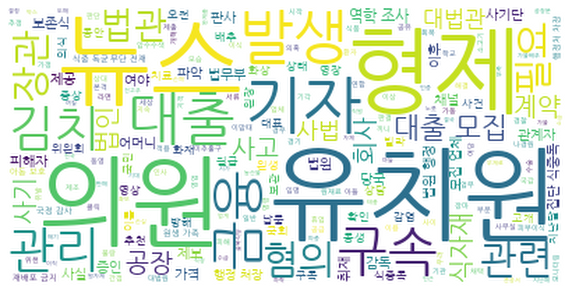

In [60]:
plt.figure(figsize=(10,8)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

**연습문제**

* 생활/문화, 세계, IT/과학 분야의 워드클라우드를 그려보자.

**참고**

1. Bag of Words
2. tdidf
3. 감성분석
4. 문서요약
5. 머신러닝
6. AI챗봇
7. 인공지능
8. 딥러닝
